In [69]:
# import data manipulation
import numpy as np
import pandas as pd

# import data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import model helper creation & evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report 
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

#import Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

import pickle

In [70]:
# loading in training dataframe
train_df = pd.read_csv('train.csv')

In [71]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
# distribution of female passengers
female = train_df.query('Sex == "female"')['Sex']
fem_percent = female.count() / len(train_df['Sex'])

# distribution of male passengers
male = train_df.query('Sex == "male"')['Sex']
male_percent = male.count() / len(train_df['Sex'])

print(f'Total Percentage of Females : {fem_percent:.4f}')
print(f'Total Percentage of Males : {male_percent:.4f}')

Total Percentage of Females : 0.3524
Total Percentage of Males : 0.6476


In [75]:
# distribution of survived female passengers
female_survived = train_df.query('Sex == "female"')['Survived']
fem_surv_percent = female_survived.sum() / len(female_survived)

# distribution of survived male passengers
male_survived = train_df.query('Sex == "male"')['Survived']
male_surv_percent = male_survived.sum() / len(male_survived)

print(f'Survival Percentage of Females : {fem_surv_percent:.4f}')
print(f'Survival Percentage of Males : {male_surv_percent:.4f}')

Survival Percentage of Females : 0.7420
Survival Percentage of Males : 0.1889


In [76]:
# setting all column variables to lower case
train_df.columns = [x.lower() for x in train_df.columns]

In [77]:
train_df

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
# lowercase validation
train_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
train_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
# checking NaN values
train_df.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [81]:
# distribution of NaN values in 'Age' variable
age_na_distro = train_df['age'].isna().value_counts(normalize=True)
age_na_distro

age
False    0.801347
True     0.198653
Name: proportion, dtype: float64

In [82]:
# unique value-counts for 'Embarked'variable
train_df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [83]:
# reviewing NaN records for 'embarked'
embarked_na = train_df[train_df['embarked'].isna()]
embarked_na

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [84]:
# attempting to see all duplicates apparent
train_df[train_df.duplicated()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked


In [85]:
train_df[train_df.duplicated(subset=['ticket'], keep=False)]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [86]:
# random ticket number chosen for identification of any similarities in records shown
train_df.query('ticket == "349909"')

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,NaN,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S


C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


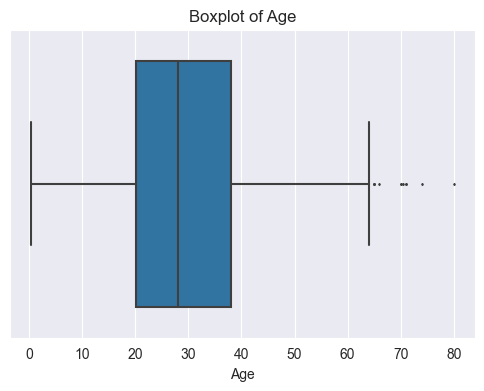

In [87]:
# 'Age' boxplot
fig, ax = plt.subplots(figsize=(6,4))

sns.boxplot(data = train_df, x='age', fliersize=1)

plt.title('Boxplot of Age')
ax.set_xlabel('Age')

plt.show()

C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


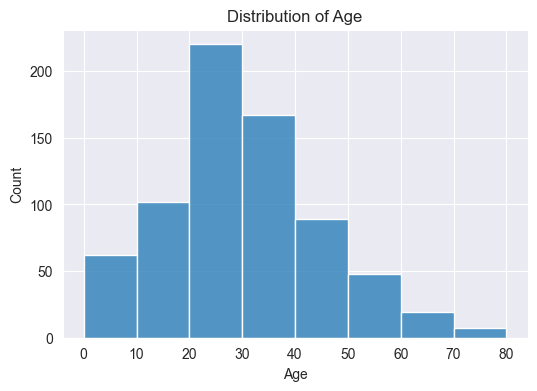

In [88]:
# 'Age' histplot
fig, ax = plt.subplots(figsize=(6,4))

sns.histplot(data = train_df, x='age', bins=range(0,81,10))

plt.title('Distribution of Age')
ax.set_xlabel('Age')

plt.show()

In [89]:
# replacing NaN values in 'Age' with median value of variable (28)
train_df['age'].fillna(value = train_df['age'].median(),
                       inplace = True)

In [90]:
# 'Age' NaN impute validation
train_df['age'].isna().sum()

0

C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


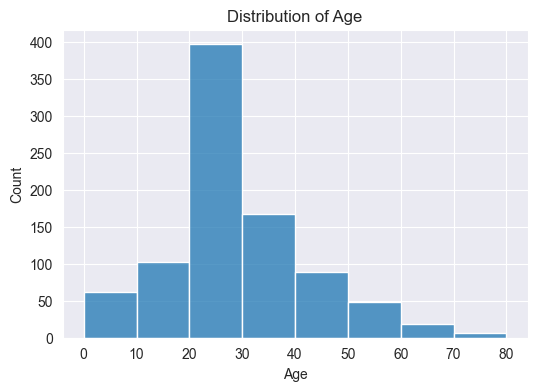

In [91]:
# re-evaluating 'Age' distribution after filling NaNs
fig, ax = plt.subplots(figsize=(6,4))

sns.histplot(data = train_df, x='age', bins=range(0,81,10))

plt.title('Distribution of Age')
ax.set_xlabel('Age')

plt.show()

C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


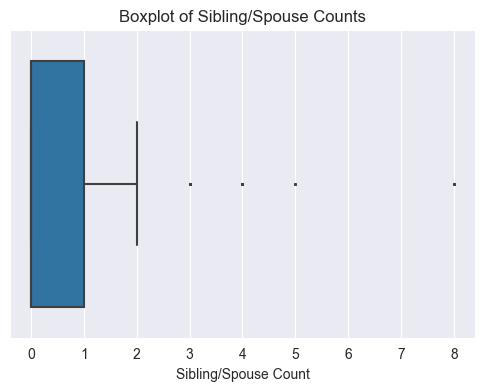

In [92]:
# 'sibsp' boxplot
fig, ax = plt.subplots(figsize=(6,4))

sns.boxplot(data = train_df, x='sibsp', fliersize=1)

plt.title('Boxplot of Sibling/Spouse Counts')
ax.set_xlabel('Sibling/Spouse Count')

plt.show()

C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


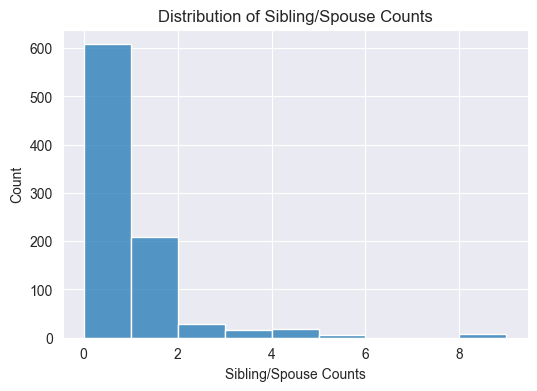

In [93]:
# 'sibsp' histplot
fig, ax = plt.subplots(figsize=(6,4))

sns.histplot(data = train_df, x='sibsp', bins=range(0,10,1))

plt.title('Distribution of Sibling/Spouse Counts')
ax.set_xlabel('Sibling/Spouse Counts')

plt.show()

C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


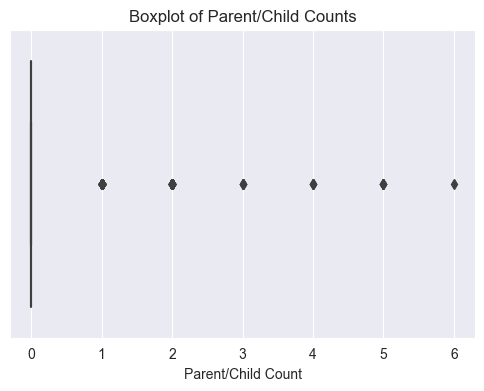

In [94]:
# 'parch' boxplot
fig, ax = plt.subplots(figsize=(6,4))

sns.boxplot(data = train_df, x='parch')

plt.title('Boxplot of Parent/Child Counts')
ax.set_xlabel('Parent/Child Count')

plt.show()

C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


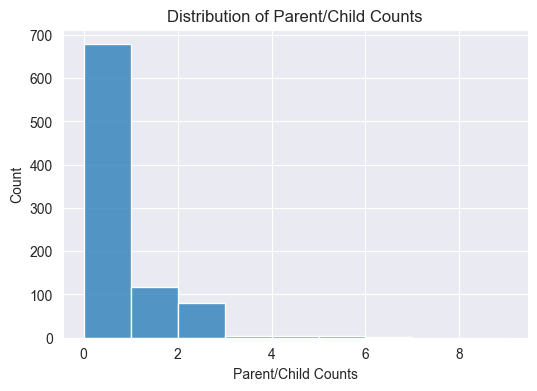

In [95]:
# 'parch' histplot
fig, ax = plt.subplots(figsize=(6,4))

sns.histplot(data = train_df, x='parch', bins=range(0,10,1))

plt.title('Distribution of Parent/Child Counts')
ax.set_xlabel('Parent/Child Counts')

plt.show()

C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

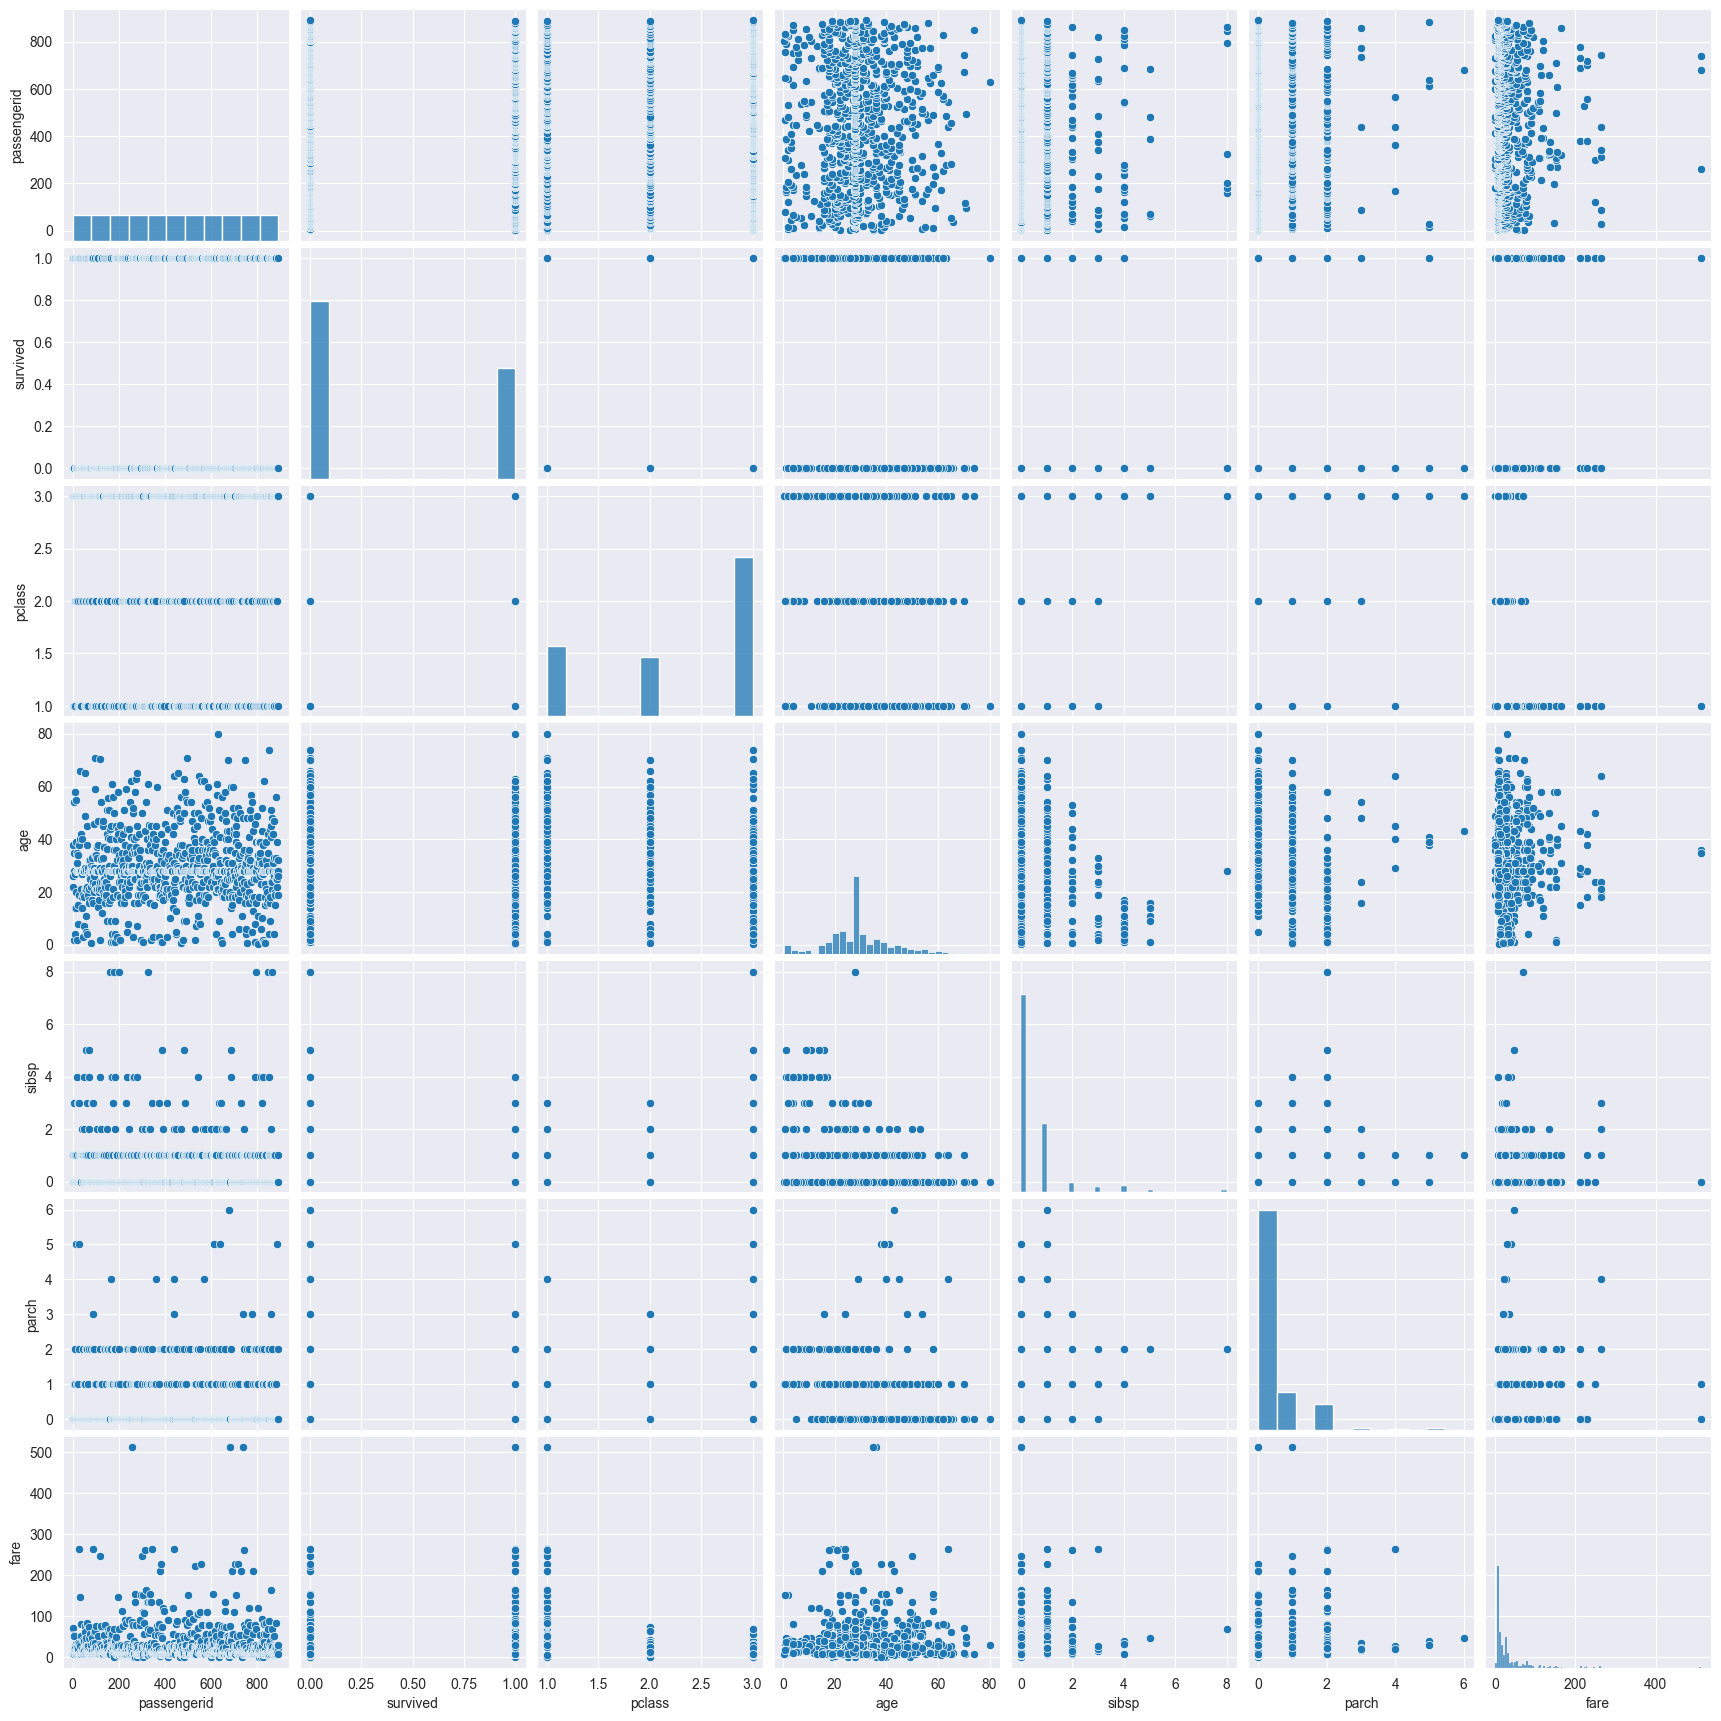

In [96]:
sns.pairplot(train_df)

In [97]:
def outlier_impute(x, quantile25, quantile75):
    '''
    Function to be applied to columns for calculating the relative outer threshold and assigning outlier values to the calculated outer threshold;
    expected to be passed the values for the column, the 25th & 75th percentiles of column
    '''
    iqr = quantile75 - quantile25
    outer_thresh = quantile75 + (1.5 * iqr)
    if x > outer_thresh:
        x = outer_thresh
    else:
        x = x
    
    return x

In [98]:
# quantile & stats calculations for 'sibsp' variable - to be used in outlier imputing
percentile_25_sibsp = train_df['sibsp'].quantile(0.25)
percentile_75_sibsp = train_df['sibsp'].quantile(0.75)

# storing median
median_sibsp = train_df['sibsp'].median()

In [99]:
print(percentile_25_sibsp, percentile_75_sibsp, median_sibsp)

0.0 1.0 0.0


In [100]:
# applying function to impute outliers for 'sibsp' variable
train_df.sibsp = train_df.sibsp.apply(outlier_impute,
                                      args = (percentile_25_sibsp, percentile_75_sibsp))

C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


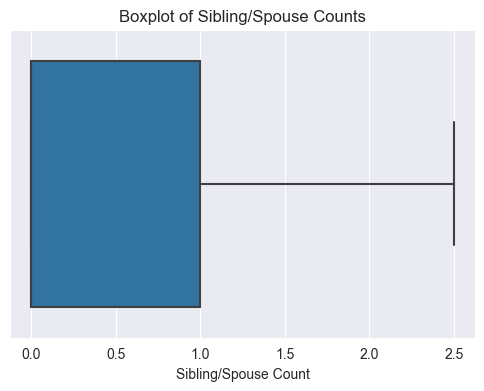

In [101]:
# 'sibsp' boxplot
fig, ax = plt.subplots(figsize=(6,4))

sns.boxplot(data = train_df, x='sibsp', fliersize=1)

plt.title('Boxplot of Sibling/Spouse Counts')
ax.set_xlabel('Sibling/Spouse Count')

plt.show()

C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


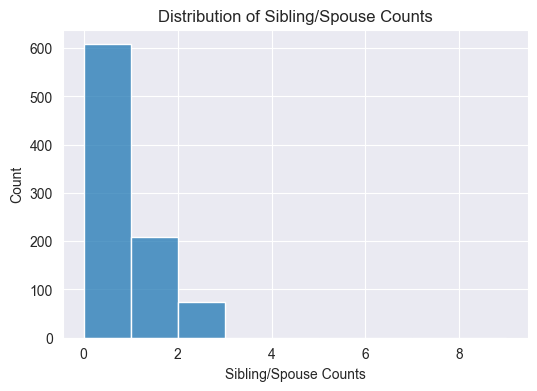

In [102]:
# 'sibsp' histplot
fig, ax = plt.subplots(figsize=(6,4))

sns.histplot(data = train_df, x='sibsp', bins=range(0,10,1))

plt.title('Distribution of Sibling/Spouse Counts')
ax.set_xlabel('Sibling/Spouse Counts')

plt.show()

In [103]:
# quantile & stats calculations for 'sibsp' variable - to be used in outlier imputing
percentile_25_parch = train_df['parch'].quantile(0.25)
percentile_75_parch = train_df['parch'].quantile(0.75)

print(percentile_25_parch, percentile_75_parch)

0.0 0.0


In [104]:
train_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,NaN,S


In [105]:
# encoding 'sex' variable by dummy mapping 
train_df = pd.get_dummies(data = train_df, 
                          columns = ['sex'], 
                          dtype = int, 
                          drop_first = True)

C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\bbind\PycharmProjects\pythonProject\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

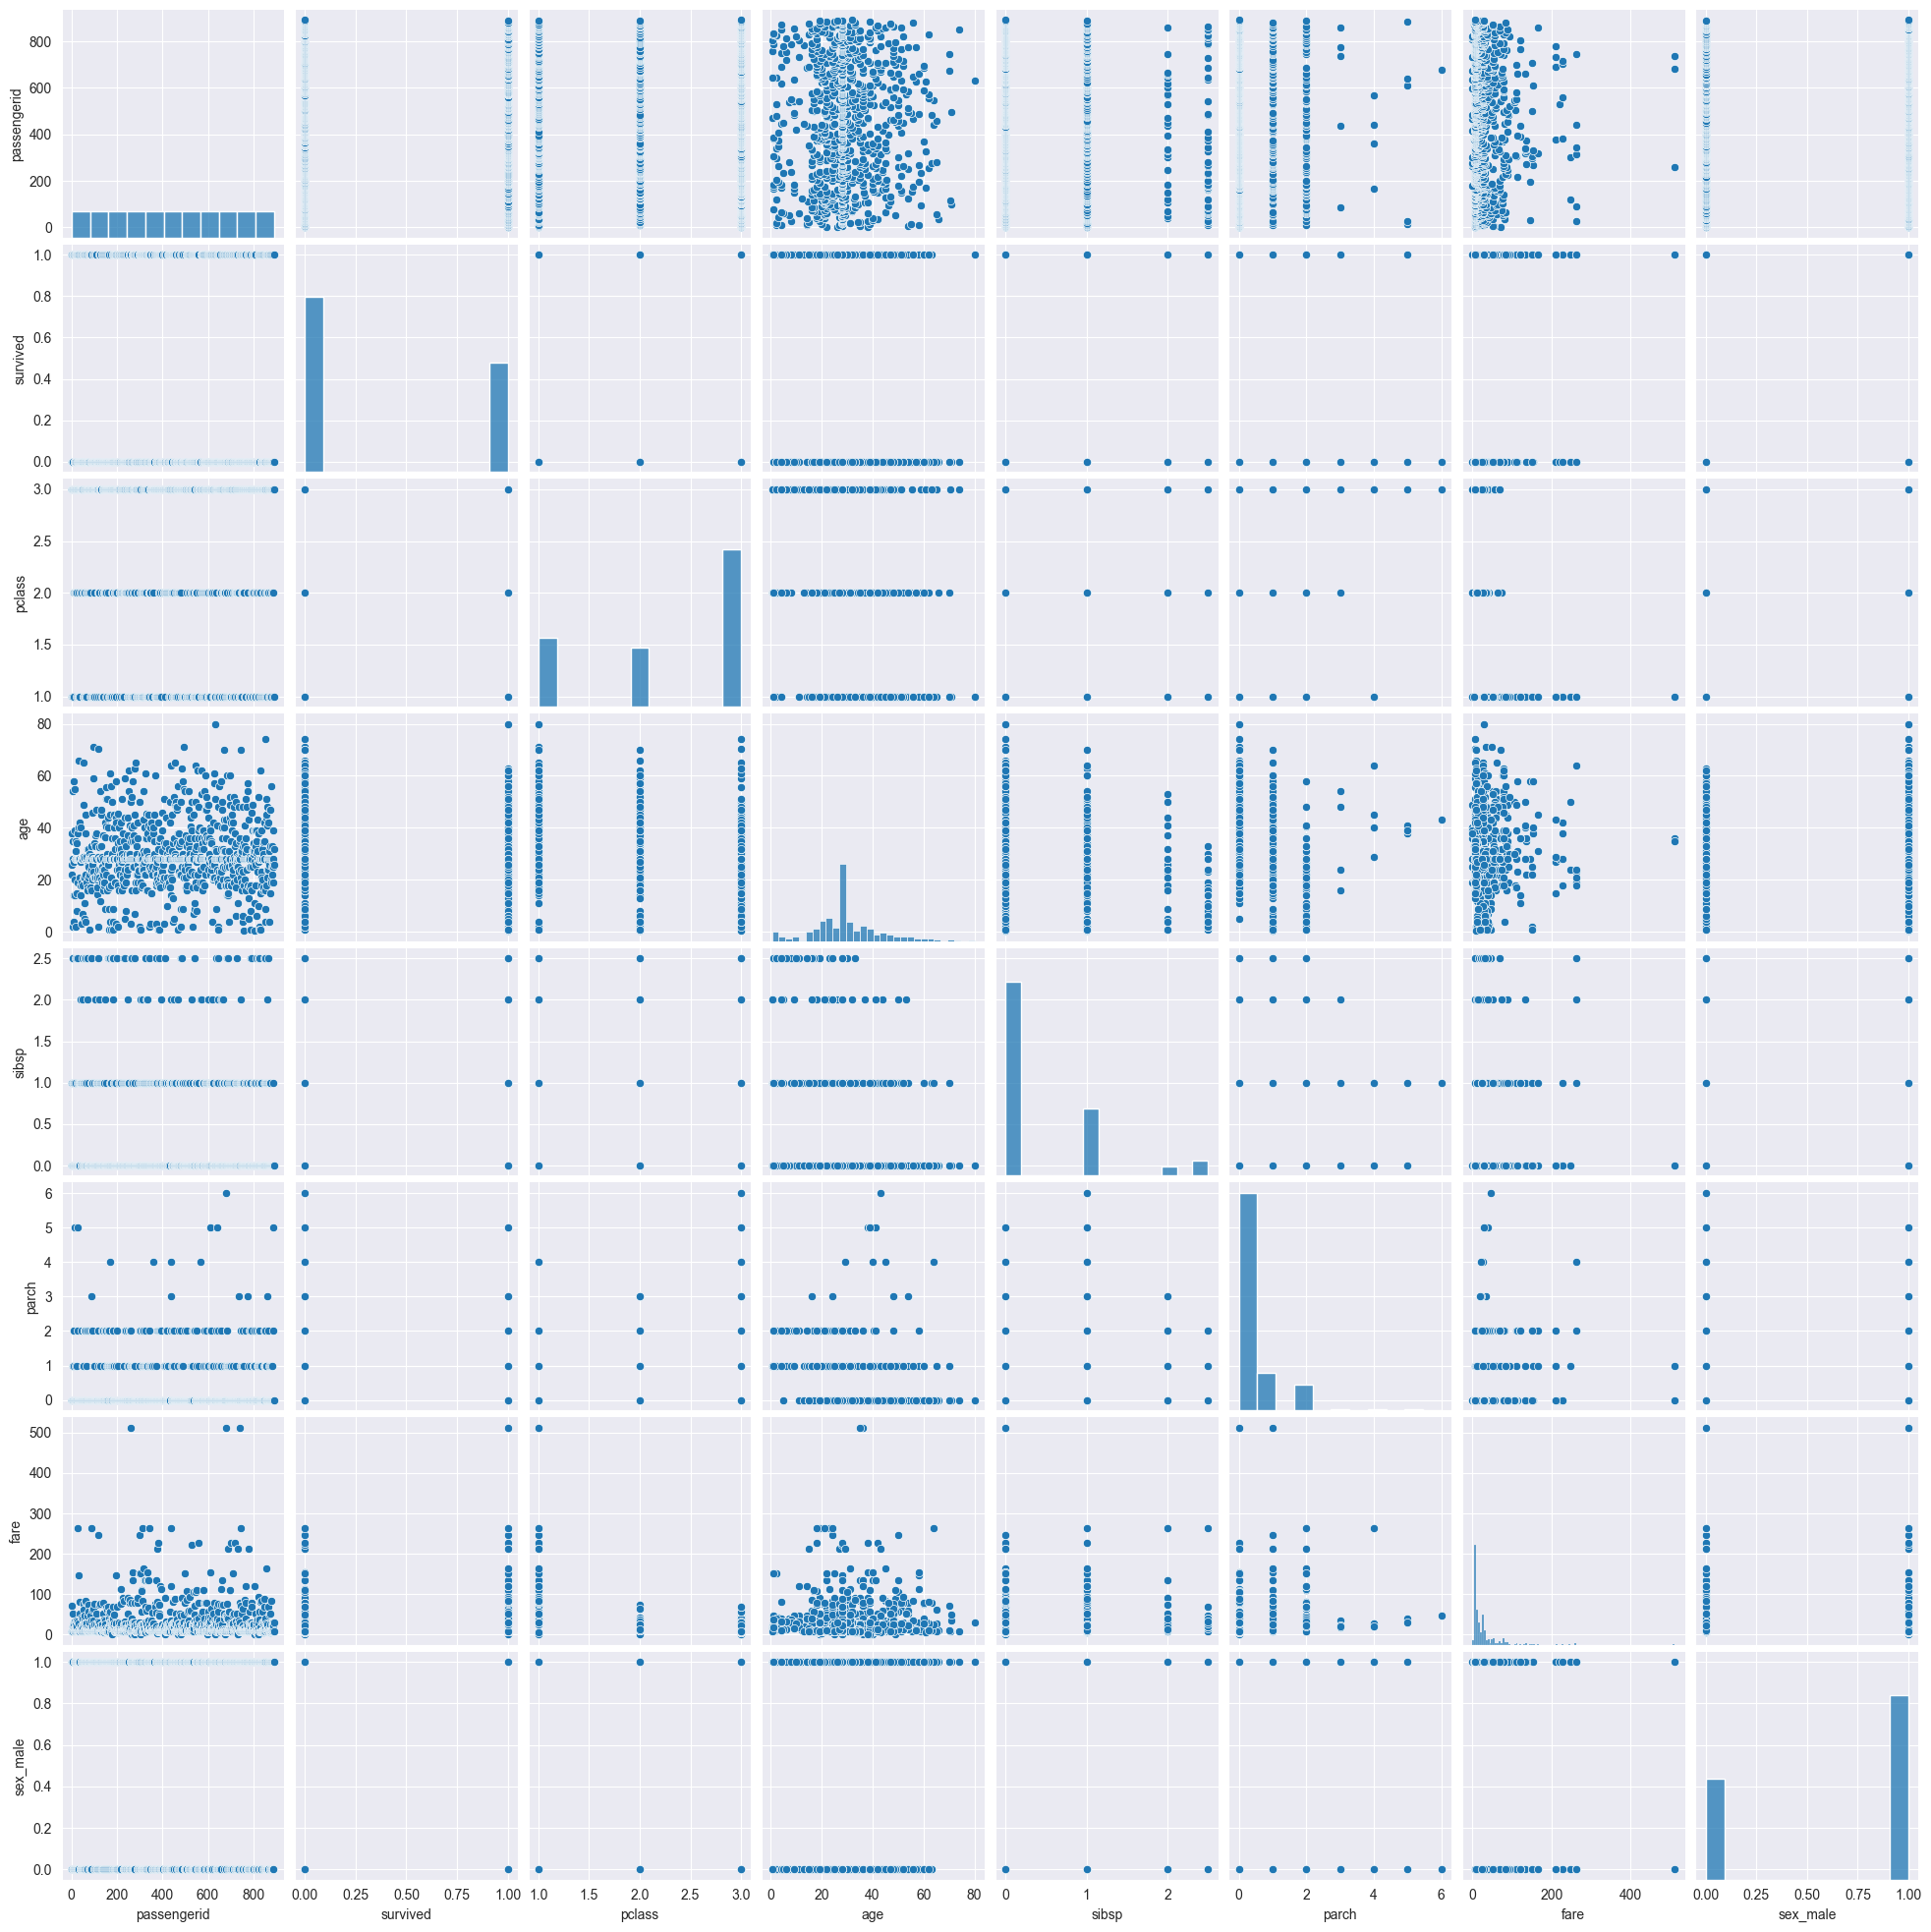

In [106]:
# re-running pairplot to double-check any change in relationships
sns.pairplot(train_df)

In [107]:
final_train_df = train_df.drop(columns = ['cabin', 'embarked', 'fare', 'ticket', 'parch', 'name', 'passengerid']).copy()

In [108]:
def make_results(model_name, accuracy_score, f1_score, precision_score, recall_score):
    '''
    Takes a model's name and model metrics to create & return a table with the provided arguments: model's name, f1 score, 
    precision score, recall score and accuracy score
    '''
    
    model_stats = {'Model' : model_name, 
                   'Accuracy' : accuracy_score,
                   'F1' : f1_score,
                   'Precision' : precision_score,
                   'Recall' : recall_score
                  }
    
    # creating empty dataframe
    table = pd.DataFrame()
    
    table = pd.concat([table, pd.DataFrame([model_stats])], ignore_index=True)
    
    return table

In [109]:
# setting scoring metrics
scoring = {'recall', 'accuracy', 'precision', 'f1'}

In [110]:
# defining X & Y variables
X = final_train_df.drop(columns=['survived']).copy()
y = final_train_df['survived']

In [111]:
# creating training & testing splits
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                              test_size = .2, 
                                              stratify = y, 
                                              random_state = 0)

In [112]:
# confirming shapes of training & testing splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 4), (179, 4), (712,), (179,))

In [113]:
# confirming 'survived' variable values stratified
y_train.value_counts(normalize=True)

survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

In [114]:
# setup hyperparameter listings
rf_params = {'n_estimators' : [150, 175, 200],
             'max_depth' : [5, 10, 15],
             'min_samples_split' : [4, 5, 6],
             'min_samples_leaf' : [1, 3],
             'max_samples': [.4,.5,.6]
            }

In [115]:
# instantiating RandomForestClassifier
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [124]:
# constructing cross-validation
rf_cv = GridSearchCV(rf, 
                     param_grid = rf, 
                     scoring = 'scoring', 
                     refit = 'accuracy', 
                     cv = 5)

In [125]:
%%time

# fitting cross-validation model to training data
rf_cv.fit(X_train, y_train)

InvalidParameterError: The 'param_grid' parameter of GridSearchCV must be an instance of 'dict' or an instance of 'list'. Got RandomForestClassifier() instead.

In [ ]:
# getting params from best fit model
rf_cv.best_params_

In [ ]:
# best 'accuracy' score from models CV'd
rf_cv.best_score_

In [ ]:
# instantiate RF model
rf_best_model = RandomForestClassifier(max_depth = 5,
                                       max_samples = 0.5,
                                       min_samples_leaf = 1,
                                       min_samples_split = 5,
                                       n_estimators = 150,
                                       random_state = 42
                                      )

In [ ]:
%%time

# training RF model with best params
rf_best_model.fit(X_train, y_train)

In [ ]:
# storing model predictions
y_pred = rf_best_model.predict(X_test)

In [ ]:
# constructing & displaying confusion matrix for trained model
rf_cm = confusion_matrix(y_test, y_pred, labels = rf_best_model.classes_)
disp = ConfusionMatrixDisplay(rf_cm, display_labels = rf_best_model.classes_)

disp.plot()
plt.show()

In [ ]:
# calculate accuracy score
rf_accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {rf_accuracy: .4f}')

# calculate precision score
rf_precision = metrics.precision_score(y_test, y_pred)
print(f'Precision Score: {rf_precision: .4f}')

# calculate recall score
rf_recall = metrics.recall_score(y_test, y_pred)
print(f'Recall Score: {rf_recall: .4f}')

# calculate f1 score
rf_f1 = metrics.f1_score(y_test, y_pred)
print(f'F1 Score: {rf_f1: .4f}')

In [ ]:
# creating table for storing trained model stats
model_results = make_results('Random Forest Model', 0.8212, 0.7419, 0.8364, 0.6667)

In [ ]:
model_results

In [ ]:
# storing trained best fit RF model
rf_model_file = 'rf.sav'
with open(rf_model_file, mode='wb') as file:
    pickle.dump(rf_best_model, file) 

In [ ]:
# instantiating Decision Tree model

xgb = XGBClassifier(objective = 'binary:logistic')

In [ ]:
# setup hyperparameter listing

xgb_cv_params = {'n_estimators' : [150, 175, 200],
                 'colsample_bytree' : [.2, .5, .8],
                 'max_depth' : [3, 5, 7, 10],
                 'subsample' : [.5, .7, .8],
                 'learning_rate' : [.01, .03, .2]
                }

In [ ]:
# constructing Decision Tree cross-validation

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_cv_params, 
                      scoring = scoring,
                      refit = 'accuracy',
                      cv = 5
                     )

In [ ]:
%%time

# fitting cross-validation model to data
xgb_cv = xgb_cv.fit(X_train, y_train)

In [ ]:
# gathering best parameters found for XGB models CV'd
xgb_cv.best_params_

In [ ]:
# best 'accuracy' score from models CV'd
xgb_cv.best_score_

In [ ]:
# re-instantiating model with best parameters

xgb_best_fit = XGBClassifier(objective = 'binary:logistic', 
                             colsample_bytree = 0.5, 
                             learning_rate = 0.2,
                             max_depth = 7,
                             n_estimators = 150,
                             subsample = 0.5,
                             verbose = False,
                             random_state = 42
                            )

In [ ]:
%%time

# fitting model with best parameters

xgb_best_fit.fit(X_train, y_train)

In [ ]:
# storing model predictions
y_pred = xgb_best_fit.predict(X_test)

In [ ]:
# constructing & displaying confusion matrix for trained model
xgb_cm = confusion_matrix(y_test, y_pred, labels = xgb_best_fit.classes_)
disp = ConfusionMatrixDisplay(xgb_cm, display_labels = xgb_best_fit.classes_)

disp.plot()
plt.show()

In [ ]:
# calculate accuracy score
xgb_accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {xgb_accuracy: .4f}')

# calculate precision score
xgb_precision = metrics.precision_score(y_test, y_pred)
print(f'Precision Score: {xgb_precision: .4f}')

# calculate recall score
xgb_recall = metrics.recall_score(y_test, y_pred)
print(f'Recall Score: {xgb_recall: .4f}')

# calculate f1 score
xgb_f1 = metrics.f1_score(y_test, y_pred)
print(f'F1 Score: {xgb_f1: .4f}')

In [ ]:
# reviewing most impactful variables for decision tree
plot_importance(xgb_best_fit)

In [ ]:
# storing trained best fit XGB model
xgb_model_file = 'xgb.sav'
with open(xgb_model_file, mode='wb') as xgb_file:
    pickle.dump(xgb_best_fit, xgb_file) 

In [ ]:
# creating table for XGB model stats
xgb_results = make_results('XGBoost Decision Tree', 0.8324, 0.7619, 0.8421, 0.6957)

In [ ]:
# appending XGB model stats to overall models table
model_results = pd.concat([xgb_results, model_results])
model_results

In [ ]:
# instantiate model
logreg = LogisticRegression(solver = 'lbfgs')

In [ ]:
# params for max_iter to CV
logreg_params = {'max_iter' : [100, 125, 150]}

In [ ]:
# instantiating CV
logreg_cv = GridSearchCV(logreg, 
                         param_grid = logreg_params, 
                         scoring = scoring, 
                         refit = 'accuracy', 
                         cv = 5)

In [ ]:
%%time

# fitting CV model

logreg_cv.fit(X_train, y_train)

In [ ]:
# instantiating best fit model
logreg_best_fit = LogisticRegression(solver = 'lbfgs', max_iter = 100)

In [ ]:
%%time

# fitting best fit model
logreg_best_fit.fit(X_train, y_train)

In [ ]:
# storing model predictions
y_pred = logreg_best_fit.predict(X_test)

In [ ]:
# creating & displaying confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels = logreg_best_fit.classes_)
disp = ConfusionMatrixDisplay(log_cm, display_labels = logreg_best_fit.classes_)

disp.plot()
plt.show()

In [ ]:
# calculate accuracy score
log_accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {log_accuracy: .4f}')

# calculate precision score
log_precision = metrics.precision_score(y_test, y_pred)
print(f'Precision Score: {log_precision: .4f}')

# calculate recall score
log_recall = metrics.recall_score(y_test, y_pred)
print(f'Recall Score: {log_recall: .4f}')

# calculate f1 score
log_f1 = metrics.f1_score(y_test, y_pred)
print(f'F1 Score: {log_f1: .4f}')

In [ ]:
# storing trained best fit XGB model
logreg_model_file = 'logreg.sav'
with open(logreg_model_file, mode='wb') as logreg_file:
    pickle.dump(logreg_best_fit, logreg_file) 

In [ ]:
# appending logistic regression metrics to stats table for models
logreg_results = make_results('Logistic Regression (lbfgs)', 0.7765, 0.6970, 0.7302, 0.6667)

In [ ]:
# appending logistic regression metrics to overall "models" table
model_results = pd.concat([logreg_results, model_results])

In [ ]:
# storing table of model metrics & sorting by 'Accuracy' score
model_results = model_results.reset_index(drop=True).sort_values(by=['Accuracy'], ascending=False)

In [ ]:
model_results

In [ ]:
# importing unseen test data
test_data = pd.read_csv('test.csv')

In [ ]:
# setting all column variables to lower case
test_data.columns = [x.lower() for x in test_data.columns]

In [ ]:
test_data.info()

In [ ]:
# checking NaN values in test data
test_data.isna().sum()

In [ ]:
# encoding 'sex' variable by dummy mapping 
test_data = pd.get_dummies(data = test_data, 
                          columns = ['sex'], 
                          dtype = int, 
                          drop_first = True)

In [ ]:
# verifying one-hot encoding for 'sex' variable
test_data.head()

In [ ]:
# setting variables to be used for gathering predictions
X_unseen = test_data[['pclass', 'age', 'sibsp', 'sex_male']]

In [ ]:
# reviewing leftover NaNs for unseen test data
X_unseen.isna().sum()

In [ ]:
# storing predictions
xgb_pred = xgb_best_fit.predict(X_unseen)

In [ ]:
# creating dataframe for submission
output = pd.DataFrame({'PassengerID' : test_data.passengerid, 'Survived' : xgb_pred})

In [ ]:
# verifying submission dataframe creation
output.head()

In [ ]:
# confirming 418 rows for submission shape required
output.shape

In [ ]:
# outputting submission dataframe to csv
output.to_csv('titanic_submission.csv', index=False)